## Changing Data 
In this section, we change some datasets so that we can better analyze them

In [12]:
import numpy as np
import pandas as pd
import json
import csv
import matplotlib.pyplot as plt
from ast import literal_eval

### Credits Dataset Preparation

In [19]:
credits = pd.read_csv("data/credits.csv")
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [3]:
credits.shape

(45476, 3)

In [5]:
credits.describe().T

,count,mean,std,min,25%,50%,75%,max
id,45476.0,108345.997537,112443.796536,2.0,26443.25,60002.5,157302.0,469172.0


In [6]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [7]:
credits.isnull().sum()

cast    0
crew    0
id      0
dtype: int64

In [8]:
credits.isna().sum()

cast    0
crew    0
id      0
dtype: int64

In [9]:
credits.columns

Index(['cast', 'crew', 'id'], dtype='object')

In [10]:
credits.nunique()

cast    43019
crew    44669
id      45432
dtype: int64

In [15]:
credits.drop_duplicates(inplace=True)

In [16]:
credits.shape

(45439, 3)

In [17]:
credits.nunique()

cast    43019
crew    44669
id      45432
dtype: int64

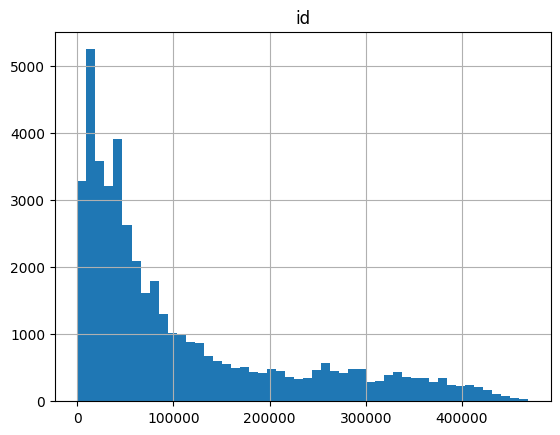

In [18]:
credits.hist(bins=50)
plt.show()

In [20]:
def get_text(text, obj='name'):
    text = literal_eval(text)
    if len(text) == 1:
        for i in text:
            return i[obj]
    else:
        s = []
        for i in text: 
            s.append(str(i[obj]))
        return ', '.join(s)

In [22]:
credits['name_crew'] = credits['crew'].apply(get_text, obj = "name")
credits['department_crew'] = credits['crew'].apply(get_text, obj = "department")
credits['gender_crew'] = credits['crew'].apply(get_text, obj = "gender")
credits['job_crew'] = credits['crew'].apply(get_text, obj = "job")
credits['profile_path_crew'] = credits['crew'].apply(get_text, obj = "profile_path")
credits['id_crew'] = credits['crew'].apply(get_text, obj = "id")

In [23]:
credits['name_cast'] = credits['cast'].apply(get_text, obj = "name")
credits['order_cast'] = credits['cast'].apply(get_text, obj = "order")
credits['gender_cast'] = credits['cast'].apply(get_text, obj = "gender")
credits['credit_id_cast'] = credits['cast'].apply(get_text, obj = "credit_id")
credits['profile_path_cast'] = credits['cast'].apply(get_text, obj = "profile_path")
credits['id_cast'] = credits['cast'].apply(get_text, obj = "id")
credits['character_cast'] = credits['cast'].apply(get_text, obj = "character")

In [24]:
newCredits = credits.drop(["crew", "cast"], axis=1)

In [25]:
newCredits.head()

,id,name_crew,department_crew,gender_crew,job_crew,profile_path_crew,id_crew,name_cast,order_cast,gender_cast,credit_id_cast,profile_path_cast,id_cast,character_cast
0,862,"John Lasseter, Joss Whedon, Andrew Stanton, Jo...","Directing, Writing, Writing, Writing, Writing,...","2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2...","Director, Screenplay, Screenplay, Screenplay, ...","/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg, /dTiVsuaTVTe...","7879, 12891, 7, 12892, 12893, 12894, 12895, 12...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12","2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2","52fe4284c3a36847f8024f95, 52fe4284c3a36847f802...","/pQFoyx7rp09CJTAb932F2g8Nlho.jpg, /uX2xVf6pMmP...","31, 12898, 7167, 12899, 12900, 7907, 8873, 111...","Woody (voice), Buzz Lightyear (voice), Mr. Pot..."
1,8844,"Larry J. Franco, Jonathan Hensleigh, James Hor...","Production, Writing, Sound, Directing, Editing...","2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2","Executive Producer, Screenplay, Original Music...","None, /l1c4UFD3g0HVWj5f0CxXAvMAGiT.jpg, /oLOtX...","511, 876, 1729, 4945, 4951, 4952, 8023, 9967, ...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, 0...","52fe44bfc3a36847f80a7c73, 52fe44bfc3a36847f80a...","/sojtJyIV3lkUeThD7A2oHNm8183.jpg, /7il5D76vx6Q...","2157, 8537, 205, 145151, 5149, 10739, 58563, 1...","Alan Parrish, Samuel Alan Parrish / Van Pelt, ..."
2,15602,"Howard Deutch, Mark Steven Johnson, Mark Steve...","Directing, Writing, Writing, Crew","2, 2, 2, 2","Director, Characters, Writer, Sound Recordist","/68Vae1HkU1NxQZ6KEmuxIpno7c9.jpg, /6trChNn3o2b...","26502, 16837, 16837, 1551320","Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","0, 1, 2, 3, 4, 5, 6","2, 2, 1, 1, 1, 2, 2","52fe466a9251416c75077a8d, 52fe466a9251416c7507...","/xJVkvprOnzP5Zdh5y63y8HHniDZ.jpg, /chZmNRYMtqk...","6837, 3151, 13567, 16757, 589, 16523, 7166","Max Goldman, John Gustafson, Ariel Gustafson, ..."
3,31357,"Forest Whitaker, Ronald Bass, Ronald Bass, Ezr...","Directing, Writing, Production, Production, Pr...","2, 0, 0, 2, 1, 0, 0, 0, 2, 0","Director, Screenplay, Producer, Producer, Prod...","/4pMQkelS5lK661m9Kz3oIxLYiyS.jpg, None, None, ...","2178, 5144, 5144, 21968, 70592, 111118, 111118...","Whitney Houston, Angela Bassett, Loretta Devin...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9","1, 1, 1, 1, 2, 2, 2, 2, 2, 2","52fe44779251416c91011aad, 52fe44779251416c9101...","/69ouDnXnmklYPr4sMJXWKYz81AL.jpg, /tHkgSzhEuJK...","8851, 9780, 18284, 51359, 66804, 352, 87118, 3...","Savannah 'Vannah' Jackson, Bernadine 'Bernie' ..."
4,11862,"Alan Silvestri, Elliot Davis, Nancy Meyers, Na...","Sound, Camera, Writing, Production, Writing, D...","2, 2, 1, 1, 2, 2, 2","Original Music Composer, Director of Photograp...","/chEsfnDEtRmv1bfOaNAoVEzhCc6.jpg, None, /nMPHU...","37, 5506, 17698, 17698, 26160, 56106, 68755","Steve Martin, Diane Keaton, Martin Short, Kimb...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11","2, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1","52fe44959251416c75039eb9, 52fe44959251416c7503...","/rI2EMvkfKKPKa5z0nM2pFVBtUyO.jpg, /fzgUMnbOkxC...","67773, 3092, 519, 70696, 59222, 18793, 14592, ...","George Banks, Nina Banks, Franck Eggelhoffer, ..."


In [26]:
newCredits.shape

(45476, 14)

In [27]:
newCredits.to_csv('data/NewCredits.csv', index=False)

### Keywords Dataset Preparation

In [61]:
keywords = pd.read_csv("data/keywords.csv")
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [62]:
keywords.shape

(46419, 2)

In [63]:
keywords.describe().T

,count,mean,std,min,25%,50%,75%,max
id,46419.0,109769.951873,113045.780256,2.0,26810.5,61198.0,159908.5,469172.0


In [64]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [65]:
keywords.isnull().sum()

id          0
keywords    0
dtype: int64

In [66]:
keywords.isna().sum()

id          0
keywords    0
dtype: int64

In [67]:
keywords.columns

Index(['id', 'keywords'], dtype='object')

In [68]:
keywords.nunique()

id          45432
keywords    25989
dtype: int64

In [69]:
keywords.drop_duplicates(inplace=True)

In [70]:
keywords.shape

(45432, 2)

In [71]:
keywords.nunique()

id          45432
keywords    25989
dtype: int64

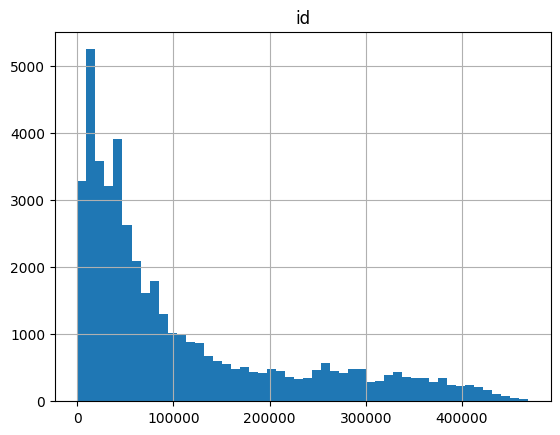

In [72]:
keywords.hist(bins=50)
plt.show()

In [73]:
keywords['name_keywords'] = keywords['keywords'].apply(get_text, obj = "name")
keywords['id_keywords'] = keywords['keywords'].apply(get_text, obj = "id")

In [74]:
NewKeywords = keywords.drop(["keywords"], axis=1)

In [75]:
NewKeywords.head()

,id,name_keywords,id_keywords
0,862,"jealousy, toy, boy, friendship, friends, rival...","931, 4290, 5202, 6054, 9713, 9823, 165503, 170..."
1,8844,"board game, disappearance, based on children's...","10090, 10941, 15101, 33467, 158086, 158091"
2,15602,"fishing, best friend, duringcreditsstinger, ol...","1495, 12392, 179431, 208510"
3,31357,"based on novel, interracial relationship, sing...","818, 10131, 14768, 15160, 33455"
4,11862,"baby, midlife crisis, confidence, aging, daugh...","1009, 1599, 2246, 4995, 5600, 10707, 13149, 33..."


In [76]:
NewKeywords.to_csv('data/NewKeywords.csv', index=False)

## Movies Dataset Preparation

In [112]:
movies = pd.read_csv("data/movies_metadata.csv", low_memory=False)
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [113]:
movies.shape

(45466, 24)

In [114]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
revenue,45460.0,1.120935e+07,6.433225e+07,0.0,0.0,0.0,0.0,2.787965e+09
runtime,45203.0,9.412820e+01,3.840781e+01,0.0,85.0,95.0,107.0,1.256000e+03
vote_average,45460.0,5.618207e+00,1.924216e+00,0.0,5.0,6.0,6.8,1.000000e+01
vote_count,45460.0,1.098973e+02,4.913104e+02,0.0,3.0,10.0,34.0,1.407500e+04


In [115]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [116]:
movies.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [117]:
movies.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [118]:
movies.nunique()

adult                        5
belongs_to_collection     1698
budget                    1226
genres                    4069
homepage                  7673
id                       45436
imdb_id                  45417
original_language           92
original_title           43373
overview                 44307
popularity               43758
poster_path              45024
production_companies     22708
production_countries      2393
release_date             17336
revenue                   6863
runtime                    353
spoken_languages          1931
status                       6
tagline                  20283
title                    42277
video                        2
vote_average                92
vote_count                1820
dtype: int64

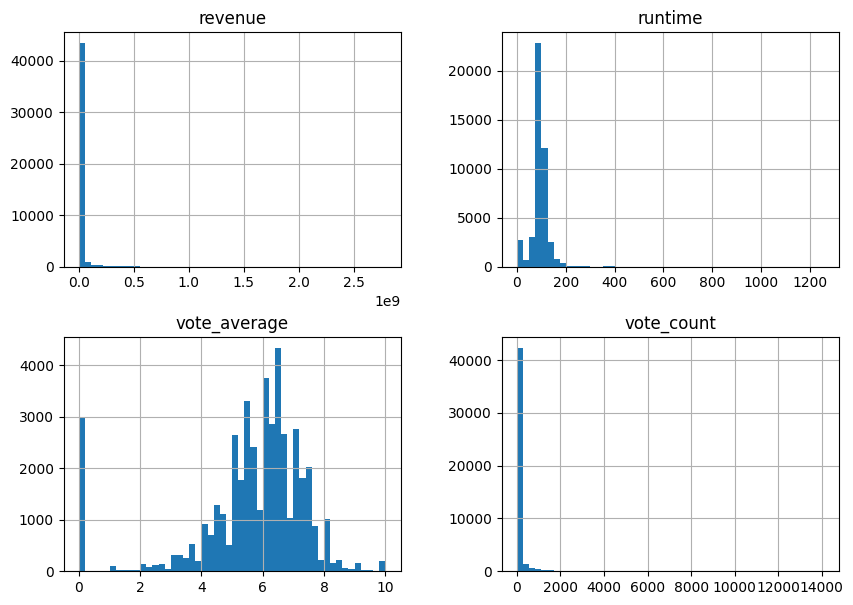

In [119]:
movies.hist(bins=50, figsize=(10, 7))
plt.show()

In [120]:
def is_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

In [121]:
for i in range(movies.shape[0]):
    if is_float(movies.loc[i, 'production_countries']) or is_float(movies.loc[i, 'production_companies']):
        movies.drop(index=i, inplace=True)
movies.shape

(45460, 24)

In [123]:
movies.dropna(subset=['production_companies', 'production_countries'], inplace=True)
movies.shape

(45460, 24)

In [124]:
movies.drop_duplicates(inplace=True)
movies.shape

(45443, 24)

In [126]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [127]:
def json_to_arr(cell, wanted="name"):
    cell = literal_eval(cell)
    if cell == [] or (isinstance(cell, float) and cell.isna()):
        return np.nan
    result = []
    counter = 0
    for element in cell:
        if counter < 3:
            result.append(element[wanted])
            counter += 1
        else:
            break
    return result[:3]

In [128]:
movies = movies.fillna("NANE")

In [130]:
def get_new_text(text, obj='name'):
    if(text == 'NANE'):  
         return np.nan
    elif (isinstance(literal_eval(str(text)), float)):
        return np.nan
    else:
        text = literal_eval(str(text))
        for i in text:
            if(i == obj):     
                return (text[i])

In [131]:
def textGeter(text, obj='name'):
    if(text == 'NANE'):  
         return np.nan
    elif (isinstance(literal_eval(str(text)), float)):
        return np.nan
    elif(isinstance(literal_eval(str(text)), list)):
        s = []
        for i in text: 
            s.append(str(i[obj]))
        return ', '.join(s)
    else:
        text = literal_eval(str(text))
        for i in text:
            if(i == obj):     
                return (text[i])

In [133]:
movies['name_belongs_to_collection'] = movies['belongs_to_collection'].apply(get_new_text ,obj = "name")
movies['id_belongs_to_collection'] = movies['belongs_to_collection'].apply(get_new_text ,obj = "id")
movies['poster_path_belongs_to_collection'] = movies['belongs_to_collection'].apply(get_new_text ,obj = "poster_path")
movies['backdrop_path_belongs_to_collection'] = movies['belongs_to_collection'].apply(get_new_text ,obj = "backdrop_path")

In [134]:
movies['name_genres'] = movies['genres'].apply(get_text ,obj = "name")
movies['id_genres'] = movies['genres'].apply(get_text ,obj = "id")

In [135]:
movies['name_production_countries'] = movies['production_countries'].apply(get_new_text ,obj = "name")
movies['iso_3166_1_production_companies'] = movies['production_countries'].apply(get_text ,obj = "iso_3166_1")

In [136]:
movies['name_production_companies'] = movies['production_companies'].apply(get_text ,obj = "name")
movies['id_production_companies'] = movies['production_companies'].apply(get_text ,obj = "id")

In [137]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,name_belongs_to_collection,id_belongs_to_collection,poster_path_belongs_to_collection,backdrop_path_belongs_to_collection,name_genres,id_genres,name_production_countries,iso_3166_1_production_companies,name_production_companies,id_production_companies
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Toy Story Collection,10194.0,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,"Animation, Comedy, Family","16, 35, 10751",None,US,Pixar Animation Studios,3
1,False,NANE,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NANE,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,NaN,NaN,NaN,NaN,"Adventure, Fantasy, Family","12, 14, 10751",None,US,"TriStar Pictures, Teitler Film, Interscope Com...","559, 2550, 10201"
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NANE,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Grumpy Old Men Collection,119050.0,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,"Romance, Comedy","10749, 35",None,US,"Warner Bros., Lancaster Gate","6194, 19464"
3,False,NANE,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NANE,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,NaN,NaN,NaN,NaN,"Comedy, Drama, Romance","35, 18, 10749",None,US,Twentieth Century Fox Film Corporation,306
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NANE,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Father of the Bride Collection,96871.0,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,Comedy,35,None,US,"Sandollar Productions, Touchstone Pictures","5842, 9195"


In [138]:
newMovies = movies.drop(["spoken_languages" ,"genres" ,"production_countries" ,"belongs_to_collection"] ,axis=1)
newMovies.to_csv('data/NewMoviesMetadata.csv', index=False)